<a href="https://colab.research.google.com/github/HenryLiu714/ct_classification/blob/main/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X = np.load("/content/drive/MyDrive/Stem Proyectp/Project/DataStorage/set2_features.npy")
y = np.load("/content/drive/MyDrive/Stem Proyectp/Project/DataStorage/set2_labels.npy")

X2 = np.load("/content/drive/MyDrive/Stem Proyectp/Project/DataStorage/set4_features.npy") # Mix images
y2 = np.load("/content/drive/MyDrive/Stem Proyectp/Project/DataStorage/set4_labels.npy")

In [ ]:
# 70/15/15 train/test/valid split
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size = 0.3, random_state = 17)
X_test, X_valid, y_test, y_valid = train_test_split(X_rem, y_rem, test_size = 0.5, random_state = 9)

X_train2, X_rem2, y_train2, y_rem2 = train_test_split(X2, y2, test_size = 0.3, random_state = 17)
X_test2, X_valid2, y_test2, y_valid2 = train_test_split(X_rem2, y_rem2, test_size = 0.5, random_state = 9)

In [ ]:
model = keras.models.load_model("/content/drive/MyDrive/Stem Proyectp/Project/Models/model_6")
model1 = keras.models.load_model("/content/drive/MyDrive/Stem Proyectp/Project/Models/model_3")

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score, auc
from sklearn.preprocessing import LabelBinarizer as lb

In [ ]:
pred = model.predict(X_test2)

pred1 = model1.predict(X_test2)

In [ ]:
from sklearn.preprocessing import binarize

In [ ]:
yTrue = [] # Binarizing testing labels

for i in y_test2:
  if i == 2:
    j = 1
  else:
    j = i

  yTrue.append(j)

In [ ]:
yScore = []

for i in range(0, len(y_test2)):
  if y_test2[i] == 0:
    a = pred[i][0]
    yScore.append(a)

  else:
    a = pred[i][1] + pred[i][2]
    yScore.append(a)

print(yScore)

[0.9982976, 0.77991503, 0.98020023, 0.46691447, 0.4348331, 0.6013391, 0.9999997, 0.4337016, 0.58527493, 0.99999857, 1.0, 0.99414325, 0.58538663, 0.99954647, 0.4379582, 0.94786525, 0.5533014, 0.93386436, 0.9819062, 0.9978472, 0.7027889, 0.9834766, 0.38455746, 0.9938368, 1.0, 0.5814433, 1.0, 0.99999857, 0.5154527, 0.9999999, 0.9999972, 0.9850989, 0.97565335, 1.0, 0.22149527, 1.0, 0.56107056, 0.6497612, 0.6503551, 0.7071693, 0.9999974, 0.031821374, 1.0, 0.98375803, 0.97776836, 0.99502105, 0.9712788, 0.9417497, 1.0, 0.9951228, 1.0, 0.99359655, 1.0, 0.66869444, 1.0, 1.0, 0.98368645, 0.43811977, 0.96334255, 0.5227733, 1.0, 0.99994755, 0.8618075, 0.9999973, 1.0, 0.9349725, 0.9997352, 0.96972346, 0.99724585, 0.9999999, 0.9949494, 0.19647111, 0.56661594, 0.9584395, 0.9184582, 0.89515257, 0.55428016, 1.0, 0.43687737, 1.0, 0.9995624, 0.9854968, 0.9972052, 0.9968197, 0.99999994, 0.797757, 0.99582756, 0.9943515, 0.4473494, 0.99999106, 1.0, 0.60593003, 0.86082387, 0.99800444, 0.99518275, 0.6368403, 

In [ ]:
yScore1 = []

for i in range(0, len(y_test2)):
  if y_test2[i] == 0:
    a = pred1[i][0]
    yScore1.append(a)

  else:
    a = pred1[i][1] + pred1[i][2]
    yScore1.append(a)

print(yScore1)

[1.0, 0.99998486, 1.0, 0.053747285, 5.3198467e-14, 1.0, 1.9669198e-14, 7.026751e-11, 1.0, 1.0624187e-09, 9.795453e-09, 0.99996614, 1.0, 0.9997223, 1.0858818e-10, 0.99999344, 1.0, 0.9999999, 1.0, 0.9999888, 1.0, 1.0, 1.7425625e-08, 0.99988806, 1.0, 1.0, 0.9977342, 0.00014834783, 0.999913, 0.973626, 1.0, 1.0, 1.0, 1.3448273e-11, 0.9997371, 1.0, 1.0, 1.0, 0.9999989, 0.98367506, 1.1229957e-05, 0.9999987, 0.07501035, 1.0, 0.9999982, 0.999984, 1.0, 1.0, 0.92425406, 0.99616015, 1.5840651e-05, 1.0, 0.004177213, 1.0, 0.99989676, 1.0, 1.0, 6.019376e-07, 0.9999999, 1.0, 1.0, 0.6453893, 1.0, 7.947014e-06, 0.77617383, 0.9999994, 1.0, 1.0, 0.999992, 1.0, 0.999864, 0.99999994, 1.0, 1.0, 0.9998012, 0.9999713, 1.0, 0.5604818, 2.1984624e-05, 0.32536998, 0.003049413, 0.99997795, 0.9999968, 0.9998085, 1.68769e-07, 0.9999989, 0.99998415, 0.9997818, 2.9424534e-13, 2.1948094e-06, 0.99315506, 0.999912, 0.99999595, 0.99995184, 0.99986315, 1.0, 1.0, 1.0, 0.99999964, 0.999998, 0.99999964, 1.0, 0.9999988, 1.0, 0.

In [ ]:
fpr, tpr, thresholds = roc_curve(yTrue, yScore)
roc_auc = auc(fpr, tpr)
print(roc_auc)

fpr1, tpr1, thresholds1 = roc_curve(yTrue, yScore1)
roc_auc1 = auc(fpr1, tpr1)
print(roc_auc1)

0.8364638116704233
0.5904082143751566


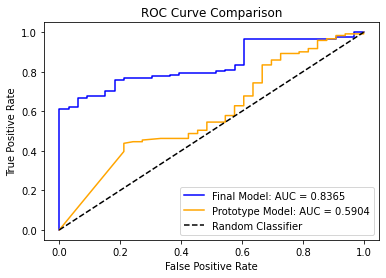

In [ ]:
plt.plot(fpr, tpr, color = "b")
plt.plot(fpr1, tpr1, color = "orange")
plt.plot([0, 1], [0, 1], color="black", linestyle="--")
plt.axis([-0.05, 1.05, -0.05, 1.05])

plt.legend(["Final Model: AUC = " + str(round(roc_auc, 4)), "Prototype Model: AUC = " + str(round(roc_auc1, 4)), "Random Classifier"])

plt.title("ROC Curve Comparison")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()